In [1]:
import torch
import matplotlib.pyplot as plt

In [4]:
x = torch.Tensor([1.4, 5, 11, 16, 21])
y = torch.Tensor([14.4, 29.6, 62, 85.5, 113.4])

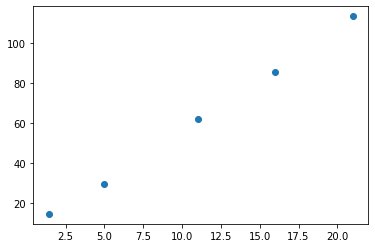

In [5]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [6]:
def Produce_X(x):
    x0 = torch.ones(x.numpy().size)
    X = torch.stack((x, x0), dim=1)
    return X

In [7]:
X = Produce_X(x)
X

tensor([[ 1.4000,  1.0000],
        [ 5.0000,  1.0000],
        [11.0000,  1.0000],
        [16.0000,  1.0000],
        [21.0000,  1.0000]])

In [8]:
inputs = X
target = y
w = torch.rand(2, requires_grad=True)

In [12]:
def train(epochs = 1, learning_rate = 0.01):
    for epoch in range(epochs):
        output = inputs.mv(w)
        loss = (output - target).pow(2).sum()

        loss.backward()
        w.data -= learning_rate * w.grad
        w.grad.zero_()
        # if epoch % 80 == 0:
        #     draw(output, loss)
    return w, loss

In [10]:
def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), '-r', lw=5)
    plt.text(0.5, 0, 'loss=%s'%(loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.005)

In [13]:
w, loss = train(10000, learning_rate=0.0001)
print(f'最终loss：{loss.item()}')
print(f'{w.data}')

最终loss：8.132037162780762
tensor([5.0673, 5.8440])
